Data Source: 

Inflation rate(2019/11-2024/02): https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_manr/default/table?lang=en

Geo Country Code: https://ec.europa.eu/eurostat/statistics-explained/images/9/9f/Country_Codes_and_Names.xlsx

Covid data: https://data.europa.eu/data/visualisation/?file=https%3A%2F%2Fopendata.ecdc.europa.eu%2Fcovid19%2Fnationalcasedeath%2Fxlsx

& https://data.europa.eu/data/datasets/covid-19-coronavirus-data?locale=en

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [84]:
df = pd.read_csv('prc_hicp_manr__custom_10532077_linear.csv')
df.head(10)

,DATAFLOW,LAST UPDATE,freq,unit,coicop,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2019-11,1.2,NaN
1,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2019-12,1.8,NaN
2,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2020-01,2.2,NaN
3,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2020-02,2.2,NaN
4,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2020-03,1.6,NaN
5,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2020-04,1.5,NaN
6,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2020-05,0.6,NaN
7,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2020-06,1.1,NaN
8,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2020-07,1.8,NaN
9,ESTAT:PRC_HICP_MANR(1.0),18/03/24 11:00:00,M,RCH_A,CP00,AT,2020-08,1.4,NaN


## Data Exploration

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     1677 non-null   object 
 1   LAST UPDATE  1677 non-null   object 
 2   freq         1677 non-null   object 
 3   unit         1677 non-null   object 
 4   coicop       1677 non-null   object 
 5   geo          1677 non-null   object 
 6   TIME_PERIOD  1677 non-null   object 
 7   OBS_VALUE    1677 non-null   float64
 8   OBS_FLAG     0 non-null      float64
dtypes: float64(2), object(7)
memory usage: 118.0+ KB


In [86]:
df.dtypes

DATAFLOW        object
LAST UPDATE     object
freq            object
unit            object
coicop          object
geo             object
TIME_PERIOD     object
OBS_VALUE      float64
OBS_FLAG       float64
dtype: object

In [88]:
## different countries:
print(df['geo'].unique())
print('\n')
print(len(df['geo'].unique()), 'countries in total')

['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EA' 'EE' 'EL' 'ES' 'EU' 'FI'
 'FR' 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'MT' 'NL' 'NO' 'PL' 'PT'
 'RO' 'SE' 'SI' 'SK' 'UK']


33 countries in total


In [89]:
## different time spot
print(df['TIME_PERIOD'].unique())
print('\n')
print(len(df['TIME_PERIOD'].unique()), 'time slots')

['2019-11' '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05'
 '2020-06' '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12'
 '2021-01' '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07'
 '2021-08' '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02'
 '2022-03' '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09'
 '2022-10' '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04'
 '2023-05' '2023-06' '2023-07' '2023-08' '2023-09' '2023-10' '2023-11'
 '2023-12' '2024-01' '2024-02']


52 time slots


In [90]:
print(df['LAST UPDATE'].unique())
print('\n')
print(len(df['LAST UPDATE'].unique()), "late update times")

['18/03/24 11:00:00']


1 late update times


In [117]:
## drop unrelevent columns 
df = df.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]
df.head(10)

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2019-11,1.2
1,AT,2019-12,1.8
2,AT,2020-01,2.2
3,AT,2020-02,2.2
4,AT,2020-03,1.6
5,AT,2020-04,1.5
6,AT,2020-05,0.6
7,AT,2020-06,1.1
8,AT,2020-07,1.8
9,AT,2020-08,1.4


## Visualization 

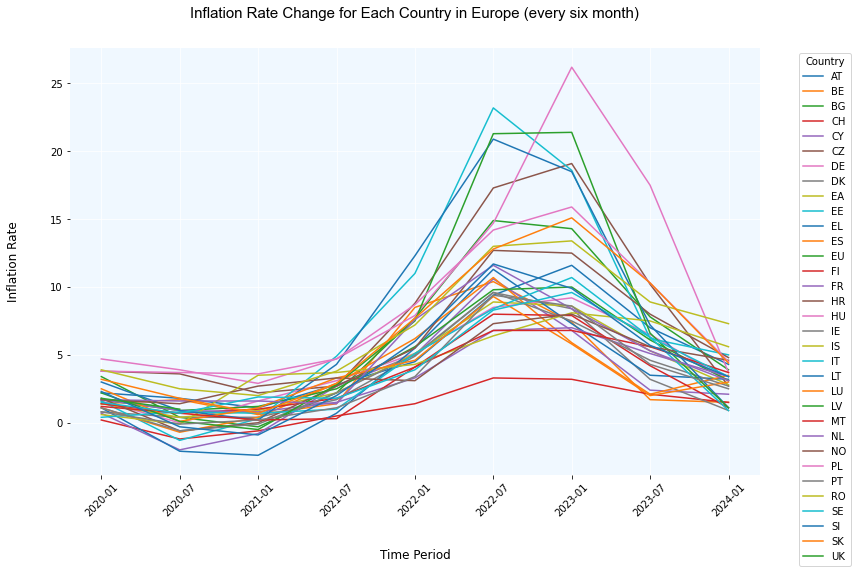

In [93]:
## check the trend for every half year

## select Jan and July as the time points for each year for each country
df_filtered = df[df['TIME_PERIOD'].str.endswith(('-01', '-07'))]
grouped_data = df_filtered.groupby('geo')


## set up the graph

# size
plt.figure(figsize=(12, 8))

#lable
for country, data in grouped_data:
    plt.plot(data['TIME_PERIOD'], data['OBS_VALUE'], label=country)

    # color
plt.gca().set_facecolor('aliceblue')
plt.grid(True, color='white')

# boarder
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# label and title 
plt.xlabel('Time Period', labelpad=30, fontsize=12)
plt.ylabel('Inflation Rate', labelpad=30, fontsize=12)
plt.title('Inflation Rate Change for Each Country in Europe (every six month)', pad=30, fontsize=15, fontname='Arial')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_filtered['TIME_PERIOD'].unique(), rotation=45)


plt.tight_layout()
plt.show()


We can see 

(1) the surge within one year from 2021/07 - 2022/07 and 

(2) quick fall after 2023/01, and 

(3) a relative stable inflation status during the second half of year 2022

--> Now we can take a close look at the data and make sure the turning point is relatively accurate

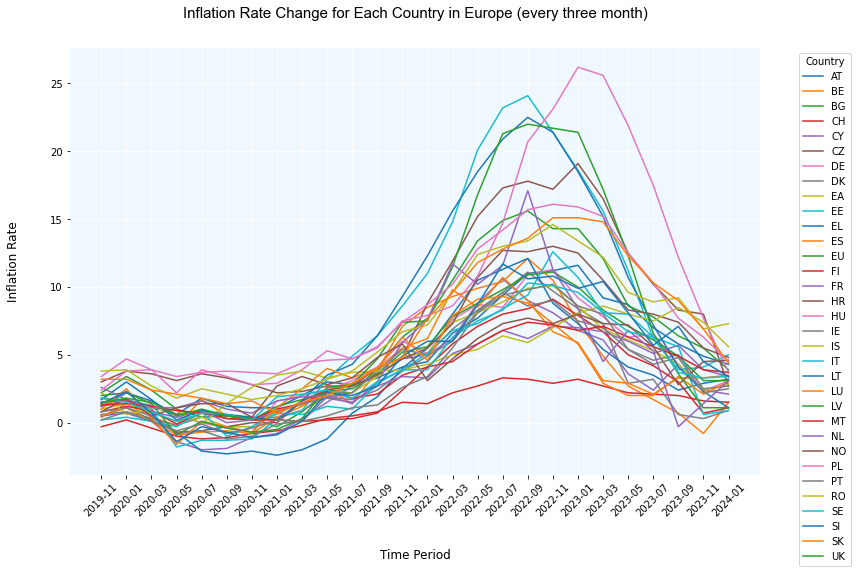

In [94]:
## check the trend for every half year

## select Jan and July as the time points for each year for each country
df_filtered = df[df['TIME_PERIOD'].str.endswith(('-01', '-03', '-05', '-07', '-09', '-11'))]
grouped_data = df_filtered.groupby('geo')


## set up the graph

# size
plt.figure(figsize=(12, 8))

#lable
for country, data in grouped_data:
    plt.plot(data['TIME_PERIOD'], data['OBS_VALUE'], label=country)

    # color
plt.gca().set_facecolor('aliceblue')
plt.grid(True, color='white')

# boarder
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# label and title 
plt.xlabel('Time Period', labelpad=30, fontsize=12)
plt.ylabel('Inflation Rate', labelpad=30, fontsize=12)
plt.title('Inflation Rate Change for Each Country in Europe (every three month)', pad=30, fontsize=15, fontname='Arial')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_filtered['TIME_PERIOD'].unique(), rotation=45)


plt.tight_layout()
plt.show()


### General insight for now

(1)The increasing trend began from the begining of 2020 and showed up obviously in mid 2021

(2)The increasing trend ceased at the end of 2022 and the inflation rate keep falling down since then. Now almost all the way went back to the previous level (2019) but still a little bit higher

(3)The surging speed and falling speed show as ‘symmetry’

(4)Countries reacted to the inflaction trend differently, manifesting as a large difference in the volatility of the lines

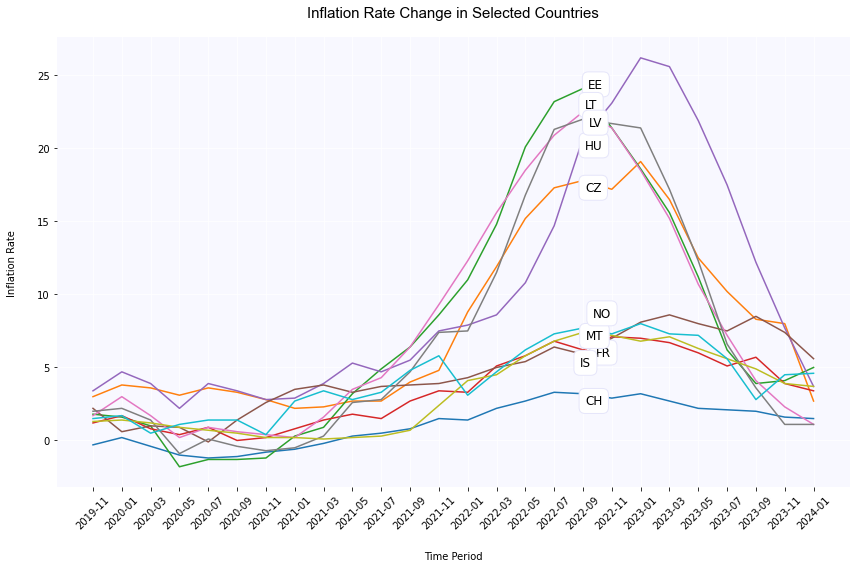

In [100]:
## simplify the graph and only see the countries with 5 highest and lowest inflation rate in 2022/09 

selected_months = ['01', '03', '05', '07', '09', '11']
df_selected_months = df[df['TIME_PERIOD'].str[-2:].isin(selected_months)]

# selest the 10 countries and concate
df_july_2022 = df_selected_months[df_selected_months['TIME_PERIOD'] == '2022-09']
top_5_countries_july_2022 = df_july_2022.nlargest(5, 'OBS_VALUE')
bottom_5_countries_july_2022 = df_july_2022.nsmallest(5, 'OBS_VALUE')
selected_countries_july_2022 = pd.concat([top_5_countries_july_2022, bottom_5_countries_july_2022])

selected_countries_list = selected_countries_july_2022['geo'].tolist()
selected_data = df_selected_months[df_selected_months['geo'].isin(selected_countries_list)]

grouped_data = selected_data.groupby('geo')

# plot
plt.figure(figsize=(12, 8))

# prepare for the label text box
texts = []  


for country, data in grouped_data:
    plt.plot(data['TIME_PERIOD'], data['OBS_VALUE'])
    
    if '2020-09' in data['TIME_PERIOD'].values:
        
        texts.append(plt.text(data[data['TIME_PERIOD'] == '2022-09']['TIME_PERIOD'], data[data['TIME_PERIOD'] == '2022-09']['OBS_VALUE'], country, fontsize=12, ha = 'left', va = 'center', bbox = dict(facecolor = 'white', edgecolor = 'lavender', boxstyle = 'round,pad=0.5')))

# adjust the text postion to avoid overlap
adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'red'))

# color
plt.gca().set_facecolor('ghostwhite')

plt.grid(True, color='white')

# boarder
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# labels and title
plt.xlabel('Time Period', labelpad = 20)  # Adjust labelpad to change the distance
plt.ylabel('Inflation Rate', labelpad = 20)
plt.title('Inflation Rate Change in Selected Countries', pad = 20, fontsize = 15, fontname = 'Arial') 
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### build an interactive geograph to show the inflation rate change

In [139]:
## process the geocode data
df_geo = pd.read_excel("Country_code.xlsx")
df_geo.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [141]:
df_geo['continentExp'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [142]:
df_geo_eur = df_geo[df_geo['continentExp']=='Europe']

In [143]:
df_geo_eur = df_geo_eur.loc[:,['geoId', 'countryterritoryCode']]
df_geo_eur.head(10)

,geoId,countryterritoryCode
340,AL,ALB
341,AL,ALB
342,AL,ALB
343,AL,ALB
344,AL,ALB
345,AL,ALB
346,AL,ALB
347,AL,ALB
348,AL,ALB
349,AL,ALB


In [149]:
df_merge = df.merge(df_geo_eur, how = 'left', left_on = 'CODE', right_on = 'geoId')

In [150]:
df_merge

,geo,TIME_PERIOD,OBS_VALUE,CODE,geoId,countryterritoryCode
0,AT,2019-11,1.2,AT,AT,AUT
1,AT,2019-11,1.2,AT,AT,AUT
2,AT,2019-11,1.2,AT,AT,AUT
3,AT,2019-11,1.2,AT,AT,AUT
4,AT,2019-11,1.2,AT,AT,AUT
...,...,...,...,...,...,...
517369,UK,2020-11,0.3,UK,UK,GBR
517370,UK,2020-11,0.3,UK,UK,GBR
517371,UK,2020-11,0.3,UK,UK,GBR
517372,UK,2020-11,0.3,UK,UK,GBR


In [306]:
df_merge_unique = df_merge.drop_duplicates()

In [307]:
df_merge_unique.head(10)

,geo,TIME_PERIOD,OBS_VALUE,CODE,geoId,countryterritoryCode
0,AT,2019-11,1.2,AT,AT,AUT
350,AT,2019-12,1.8,AT,AT,AUT
700,AT,2020-01,2.2,AT,AT,AUT
1050,AT,2020-02,2.2,AT,AT,AUT
1400,AT,2020-03,1.6,AT,AT,AUT
1750,AT,2020-04,1.5,AT,AT,AUT
2100,AT,2020-05,0.6,AT,AT,AUT
2450,AT,2020-06,1.1,AT,AT,AUT
2800,AT,2020-07,1.8,AT,AT,AUT
3150,AT,2020-08,1.4,AT,AT,AUT


In [309]:
## check the merge result
df_merge_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 517024
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   geo                   1677 non-null   object 
 1   TIME_PERIOD           1677 non-null   object 
 2   OBS_VALUE             1677 non-null   float64
 3   CODE                  1677 non-null   object 
 4   geoId                 1573 non-null   object 
 5   countryterritoryCode  1573 non-null   object 
dtypes: float64(1), object(5)
memory usage: 91.7+ KB


### Try to see the connection between inflation rate and Covid case

Since the turning points of inflation rate are close to the key points of Covid, we could assume they may share the similar trends. 

Now let's verify.

First clean the covid case before 2021

In [236]:
## df_goe is the covid data before 2021
## now concate the covid data after 
covid_2021 = pd.read_excel('COVID-19 situation update worldwide-11.xlsx')

In [238]:
covid_2021.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
0,Austria,AUT,Europe,8978929,cases,NaN,2020-01,NaN,NaN,TESSy COVID-19,NaN
1,Austria,AUT,Europe,8978929,cases,NaN,2020-02,NaN,NaN,TESSy COVID-19,NaN
2,Austria,AUT,Europe,8978929,cases,NaN,2020-03,NaN,NaN,TESSy COVID-19,NaN
3,Austria,AUT,Europe,8978929,cases,NaN,2020-04,NaN,NaN,TESSy COVID-19,NaN
4,Austria,AUT,Europe,8978929,cases,NaN,2020-05,NaN,NaN,TESSy COVID-19,NaN


In [242]:
covid_2021['weekly_count'].unique()

array([ nan,  12., 115., ..., 663., 644., 299.])

In [244]:
covid_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12648 entries, 0 to 12647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           12648 non-null  object 
 1   country_code      12240 non-null  object 
 2   continent         12648 non-null  object 
 3   population        12648 non-null  int64  
 4   indicator         12648 non-null  object 
 5   weekly_count      11783 non-null  float64
 6   year_week         12648 non-null  object 
 7   rate_14_day       11683 non-null  float64
 8   cumulative_count  11783 non-null  float64
 9   source            12648 non-null  object 
 10  note              0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.1+ MB


~10,000 rows of weekly_count are null, and it's about one tenth of the total amount:(

In [245]:
covid_2021_eur = covid_2021[covid_2021['continent']=='Europe']

In [247]:
covid_2021_eur.head(10)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
0,Austria,AUT,Europe,8978929,cases,NaN,2020-01,NaN,NaN,TESSy COVID-19,NaN
1,Austria,AUT,Europe,8978929,cases,NaN,2020-02,NaN,NaN,TESSy COVID-19,NaN
2,Austria,AUT,Europe,8978929,cases,NaN,2020-03,NaN,NaN,TESSy COVID-19,NaN
3,Austria,AUT,Europe,8978929,cases,NaN,2020-04,NaN,NaN,TESSy COVID-19,NaN
4,Austria,AUT,Europe,8978929,cases,NaN,2020-05,NaN,NaN,TESSy COVID-19,NaN
5,Austria,AUT,Europe,8978929,cases,NaN,2020-06,NaN,NaN,TESSy COVID-19,NaN
6,Austria,AUT,Europe,8978929,cases,NaN,2020-07,NaN,NaN,TESSy COVID-19,NaN
7,Austria,AUT,Europe,8978929,cases,NaN,2020-08,NaN,NaN,TESSy COVID-19,NaN
8,Austria,AUT,Europe,8978929,cases,12.0,2020-09,NaN,12.0,TESSy COVID-19,NaN
9,Austria,AUT,Europe,8978929,cases,115.0,2020-10,1.414423,127.0,TESSy COVID-19,NaN


In [254]:
covid_2021_eur_clean = covid_2021_eur[['country_code', 'weekly_count','year_week']]

In [255]:
covid_2021_eur_clean.head(10)

,country_code,weekly_count,year_week
0,AUT,NaN,2020-01
1,AUT,NaN,2020-02
2,AUT,NaN,2020-03
3,AUT,NaN,2020-04
4,AUT,NaN,2020-05
5,AUT,NaN,2020-06
6,AUT,NaN,2020-07
7,AUT,NaN,2020-08
8,AUT,12.0,2020-09
9,AUT,115.0,2020-10


In [256]:
## transfer the year-week format to year-month
covid_2021_eur_clean['year_week'] = covid_2021_eur_clean['year_week'] + '-1'
covid_2021_eur_clean['year_week'] = pd.to_datetime(covid_2021_eur_clean['year_week'], format='%Y-%W-%w')
covid_2021_eur_clean['year_week'] = pd.to_datetime(covid_2021_eur_clean['year_week'], format = '%Y-%W')
covid_2021_eur_clean['year_month'] = covid_2021_eur_clean['year_week'].dt.strftime('%Y-%m')
covid_2021_eur_clean.drop(columns=['year_week'], inplace=True)

<ipython-input-256-7f50a0bd783c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-256-7f50a0bd783c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-256-7f50a0bd783c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-256-7f5

In [259]:
covid_2021_eur_clean['year_month'].unique()

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11'],
      dtype=object)

In [280]:
covid_2021_eur_clean.head()

,country_code,weekly_count,year_month
0,AUT,NaN,2020-01
1,AUT,NaN,2020-01
2,AUT,NaN,2020-01
3,AUT,NaN,2020-01
4,AUT,NaN,2020-02


In [283]:
covid_2021_eur_clean_month = covid_2021_eur_clean.groupby(['country_code', 'year_month'])['weekly_count'].mean().reset_index()
covid_2021_eur_clean_month.rename(columns = {'weekly_count': 'monthly_count'}, inplace=True)

In [285]:
covid_2021_eur_clean_month.head()

,country_code,year_month,monthly_count
0,AUT,2020-01,NaN
1,AUT,2020-02,NaN
2,AUT,2020-03,927.80
3,AUT,2020-04,820.25
4,AUT,2020-05,159.00


Then clean the covid case after 2021

In [161]:
df_covid_eur = df_geo[df_geo['continentExp']=='Europe']
df_covid_eur.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
340,2020-12-14,14,12,2020,788,14,Albania,AL,ALB,2862427.0,Europe,380.970414
341,2020-12-13,13,12,2020,879,12,Albania,AL,ALB,2862427.0,Europe,382.612378
342,2020-12-12,12,12,2020,802,12,Albania,AL,ALB,2862427.0,Europe,370.943958
343,2020-12-11,11,12,2020,873,14,Albania,AL,ALB,2862427.0,Europe,365.459102
344,2020-12-10,10,12,2020,752,15,Albania,AL,ALB,2862427.0,Europe,357.878122


In [267]:
df_covid_case = df_covid_eur[['month', 'year', 'cases', 'countriesAndTerritories', 'countryterritoryCode', 'geoId']]

In [272]:
df_covid_case

,month,year,cases,countriesAndTerritories,countryterritoryCode,geoId
340,12,2020,788,Albania,ALB,AL
341,12,2020,879,Albania,ALB,AL
342,12,2020,802,Albania,ALB,AL
343,12,2020,873,Albania,ALB,AL
344,12,2020,752,Albania,ALB,AL
...,...,...,...,...,...,...
58723,1,2020,0,United_Kingdom,GBR,UK
58724,1,2020,0,United_Kingdom,GBR,UK
58725,1,2020,0,United_Kingdom,GBR,UK
58726,1,2020,0,United_Kingdom,GBR,UK


In [273]:
average_cases = df_covid_case.groupby(['year', 'month', 'geoId','countriesAndTerritories','countryterritoryCode'])['cases'].mean().reset_index()

In [274]:
average_cases.rename(columns={'cases': 'average_case'}, inplace=True)

In [275]:
average_cases.head()

,year,month,geoId,countriesAndTerritories,countryterritoryCode,average_case
0,2019,12,AM,Armenia,ARM,0.0
1,2019,12,AT,Austria,AUT,0.0
2,2019,12,AZ,Azerbaijan,AZE,0.0
3,2019,12,BE,Belgium,BEL,0.0
4,2019,12,BY,Belarus,BLR,0.0


In [276]:
## make sure not all the case values are 0
average_cases['average_case'].unique()

array([0.00000000e+00, 1.61290323e-01, 3.22580645e-02, 1.93548387e-01,
       9.67741935e-02, 2.41379310e-01, 3.44827586e-02, 4.13793103e-01,
       1.79310345e+00, 6.89655172e-02, 1.37931034e-01, 1.86206897e+00,
       1.75862069e+00, 1.72413793e-01, 3.05172414e+01, 2.06896552e-01,
       1.03448276e-01, 3.79310345e-01, 1.03448276e+00, 2.05555556e+01,
       9.69565217e+00, 2.41818182e+01, 3.10032258e+02, 1.13333333e+01,
       1.85789474e+01, 4.93645161e+02, 1.63181818e+01, 4.52173913e+00,
       4.96774194e+02, 1.15000000e+01, 9.68387097e+01, 1.99535484e+03,
       8.30645161e+01, 2.74615385e+01, 4.16551724e+01, 3.36170968e+03,
       4.85185185e+01, 6.46153846e+00, 1.43525806e+03, 3.42857143e+00,
       3.75000000e+00, 5.75000000e+00, 2.80357143e+01, 1.89230769e+01,
       1.00344828e+02, 3.81818182e+00, 3.50000000e+01, 3.25325806e+03,
       5.25000000e+00, 3.04761905e+00, 2.19545455e+01, 8.28333333e+01,
       1.50400000e+01, 1.84210526e+00, 1.35454545e+01, 6.50000000e+00,
      

In [277]:
average_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     640 non-null    int64  
 1   month                    640 non-null    int64  
 2   geoId                    640 non-null    object 
 3   countriesAndTerritories  640 non-null    object 
 4   countryterritoryCode     640 non-null    object 
 5   average_case             640 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 30.1+ KB


In [278]:
## how many case value is zero?
(average_cases['average_case'] == 0).sum()

76

In [279]:
## combine the month and year data so we can merger accroding to time and contry
average_cases['month'] = average_cases['month'].astype(str)

average_cases['month'] = average_cases['month'].str.zfill(2)

average_cases['time'] = average_cases['year'].astype(str) + '-' + average_cases['month']

In [288]:
average_cases.head(10)

,year,month,geoId,countriesAndTerritories,countryterritoryCode,average_case,time
0,2019,12,AM,Armenia,ARM,0.0,2019-12
1,2019,12,AT,Austria,AUT,0.0,2019-12
2,2019,12,AZ,Azerbaijan,AZE,0.0,2019-12
3,2019,12,BE,Belgium,BEL,0.0,2019-12
4,2019,12,BY,Belarus,BLR,0.0,2019-12
5,2019,12,CH,Switzerland,CHE,0.0,2019-12
6,2019,12,CZ,Czechia,CZE,0.0,2019-12
7,2019,12,DE,Germany,DEU,0.0,2019-12
8,2019,12,DK,Denmark,DNK,0.0,2019-12
9,2019,12,EE,Estonia,EST,0.0,2019-12


Now avergae_cases is the data before 2021 and covid_2021_eur_clean_month is the data before

We could combine the two dataset now

In [287]:
covid_2021_eur_clean_month.head()

,country_code,year_month,monthly_count
0,AUT,2020-01,NaN
1,AUT,2020-02,NaN
2,AUT,2020-03,927.80
3,AUT,2020-04,820.25
4,AUT,2020-05,159.00


In [295]:
full_covid = pd.concat([average_cases,
                    covid_2021_eur_clean_month.rename(columns={'year_month': 'time', 'country_code': 'countryterritoryCode', 'monthly_count': 'average_case'})],
                   keys=['average_cases', 'covid_2021_eur_clean_month'],
                   join='outer')

In [297]:
full_covid = full_covid.reset_index(level=[0, 1], drop=True)
full_covid

,year,month,geoId,countriesAndTerritories,countryterritoryCode,average_case,time
0,2019.0,12,AM,Armenia,ARM,0.000000,2019-12
1,2019.0,12,AT,Austria,AUT,0.000000,2019-12
2,2019.0,12,AZ,Azerbaijan,AZE,0.000000,2019-12
3,2019.0,12,BE,Belgium,BEL,0.000000,2019-12
4,2019.0,12,BY,Belarus,BLR,0.000000,2019-12
...,...,...,...,...,...,...,...
2045,NaN,NaN,NaN,NaN,SWE,108.000000,2023-07
2046,NaN,NaN,NaN,NaN,SWE,225.375000,2023-08
2047,NaN,NaN,NaN,NaN,SWE,340.375000,2023-09
2048,NaN,NaN,NaN,NaN,SWE,799.500000,2023-10


Now merge the covid data(full_covid) and inflation data(df_merge_unique)

In [310]:
## get the row amount so we could check the merge result easily with the number
df_merge_unique.head()

,geo,TIME_PERIOD,OBS_VALUE,CODE,geoId,countryterritoryCode
0,AT,2019-11,1.2,AT,AT,AUT
350,AT,2019-12,1.8,AT,AT,AUT
700,AT,2020-01,2.2,AT,AT,AUT
1050,AT,2020-02,2.2,AT,AT,AUT
1400,AT,2020-03,1.6,AT,AT,AUT


In [313]:
## merge the covid cases amount with the inflation rate
covid_merge = df_merge_unique.merge(full_covid, how = 'inner', left_on = ['TIME_PERIOD', 'countryterritoryCode'], right_on = ['time','countryterritoryCode'])

In [314]:
covid_merge.head(10)

,geo,TIME_PERIOD,OBS_VALUE,CODE,geoId_x,countryterritoryCode,year,month,geoId_y,countriesAndTerritories,average_case,time
0,AT,2019-12,1.8,AT,AT,AUT,2019.0,12,AT,Austria,0.000000,2019-12
1,AT,2020-01,2.2,AT,AT,AUT,2020.0,01,AT,Austria,0.000000,2020-01
2,AT,2020-01,2.2,AT,AT,AUT,NaN,NaN,NaN,NaN,NaN,2020-01
3,AT,2020-02,2.2,AT,AT,AUT,2020.0,02,AT,Austria,0.241379,2020-02
4,AT,2020-02,2.2,AT,AT,AUT,NaN,NaN,NaN,NaN,NaN,2020-02
5,AT,2020-03,1.6,AT,AT,AUT,2020.0,03,AT,Austria,310.032258,2020-03
6,AT,2020-03,1.6,AT,AT,AUT,NaN,NaN,NaN,NaN,927.800000,2020-03
7,AT,2020-04,1.5,AT,AT,AUT,2020.0,04,AT,Austria,191.533333,2020-04
8,AT,2020-04,1.5,AT,AT,AUT,NaN,NaN,NaN,NaN,820.250000,2020-04
9,AT,2020-05,0.6,AT,AT,AUT,2020.0,05,AT,Austria,41.096774,2020-05


In [317]:
covid_merger_clean = covid_merge.drop(columns = ['CODE', 'geoId_x', 'geoId_y','year', 'month','time'])

In [318]:
covid_merger_clean.head(1)

,geo,TIME_PERIOD,OBS_VALUE,countryterritoryCode,countriesAndTerritories,average_case
0,AT,2019-12,1.8,AUT,Austria,0.0


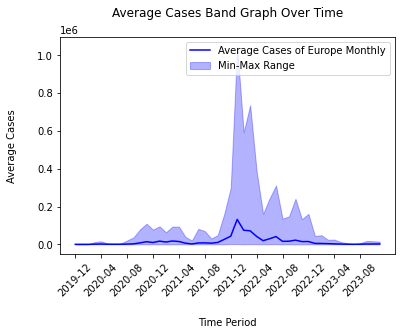

<Figure size 64800x43200 with 0 Axes>

In [326]:
# get the max and min for the average covid case number of the Europe at each time period
grouped_data = covid_merger_clean.groupby('TIME_PERIOD')['average_case'].agg(['mean', 'min', 'max'])

# plot the mean as a line
##(.index here is to specify the x value) 
plt.plot(grouped_data.index, grouped_data['mean'], label='Average Cases of Europe Monthly', color='blue')

# get the brand betweenn min and max
plt.fill_between(grouped_data.index, grouped_data['min'], grouped_data['max'], color='blue', alpha=0.3, label='Min-Max Range')

# distance between the graph and the label
plt.xlabel('Time Period', labelpad = 20)
plt.ylabel('Average Cases', labelpad = 20)
plt.title('Average Cases Band Graph Over Time', pad = 20)
plt.legend()

# dunt show every x value label
xticks = plt.xticks()[0]
plt.xticks(xticks[::len(xticks)//10])  

plt.xticks(rotation=45)

plt.figure(figsize=(900, 600))

plt.tight_layout()
plt.show()


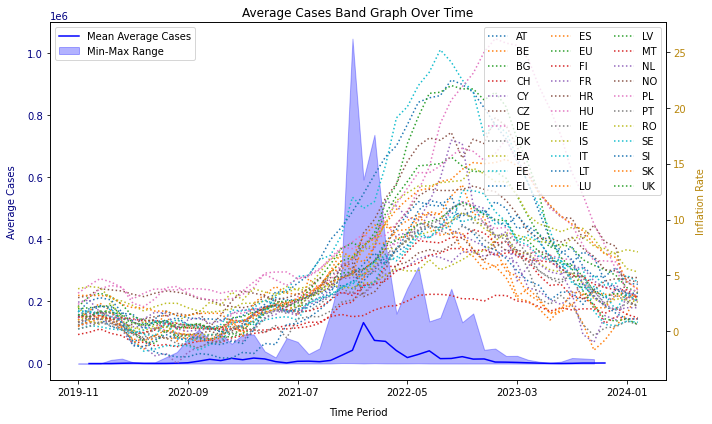

In [378]:
#grouped_data = covid_merger_clean.groupby('TIME_PERIOD')['average_case'].agg(['mean', 'min', 'max'])


fig, ax1 = plt.subplots(figsize=(10, 6))


# set up the ax1 for average cases
ax1.plot(grouped_data.index, grouped_data['mean'], label='Mean Average Cases', color='blue')
ax1.fill_between(grouped_data.index, grouped_data['min'], grouped_data['max'], color='blue', alpha=0.3, label='Min-Max Range')


ax1.set_xlabel('Time Period', labelpad = 10)  
ax1.set_ylabel('Average Cases', color = 'navy', labelpad=10)  
ax1.tick_params(axis='y', labelcolor = 'navy')
ax1.set_title('Average Cases Band Graph Over Time')


ax2 = ax1.twinx()


for country, data in df_covid_merge.groupby('geo'):
    line, = ax2.plot(data['TIME_PERIOD'], data['OBS_VALUE'], linestyle = 'dotted')
    line.set_label(country) 


ax2.set_ylabel('Inflation Rate', color = 'darkgoldenrod', labelpad = 10)  
ax2.tick_params(axis = 'y', labelcolor = 'darkgoldenrod')


ax1.legend(loc = 'upper left')


handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc = 'upper right', ncol=3)


xticks = ax1.get_xticks()
ax1.set_xticks(xticks[::10])

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

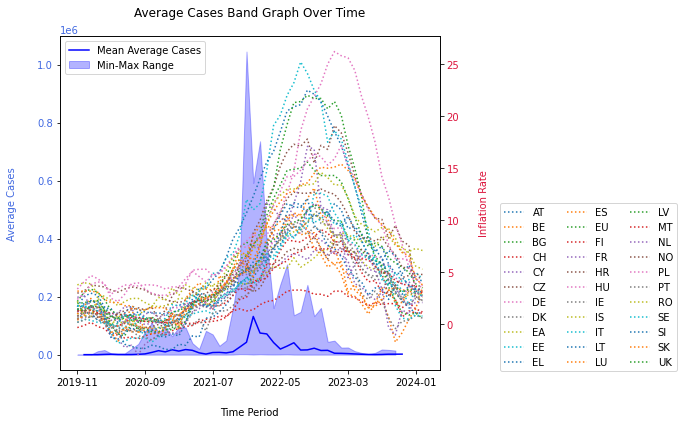

In [380]:
# grouped_data = covid_merger_clean.groupby('TIME_PERIOD')['average_case'].agg(['mean', 'min', 'max'])


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(grouped_data.index, grouped_data['mean'], label='Mean Average Cases', color='blue')


ax1.fill_between(grouped_data.index, grouped_data['min'], grouped_data['max'], color='blue', alpha=0.3, label='Min-Max Range')


ax1.set_xlabel('Time Period', labelpad = 20)  # Adjust label distance
ax1.set_ylabel('Average Cases', color = 'royalblue', labelpad = 20)  # Adjust label distance
ax1.tick_params(axis='y', labelcolor = 'royalblue')
ax1.set_title('Average Cases Band Graph Over Time', pad = 20)


ax2 = ax1.twinx()


for country, data in df_covid_merge.groupby('geo'):
    line, = ax2.plot(data['TIME_PERIOD'], data['OBS_VALUE'], linestyle='dotted')
    line.set_label(country) 


ax2.set_ylabel('Inflation Rate', color='crimson', labelpad = 20)  # Adjust label distance
ax2.tick_params(axis='y', labelcolor='crimson')


ax1.legend(loc='upper left')


handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.16, 0.5), borderaxespad=0., ncol=3)  # Position outside the graph


xticks = ax1.get_xticks()
ax1.set_xticks(xticks[::10])


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()
